# Unsupervised Learning Project

## Credit Card Customer Segmentation

### Import libraries, load data, set up options and methods

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings

from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Set package options

# Display multiple outputs for a single cell
InteractiveShell.ast_node_interactivity = 'all'

# Don't show warnings for large number of figures
plt.rc('figure', max_open_warning=0)

# Display plots inline
%matplotlib inline

# Don't truncate columns for head()
pd.set_option('display.max_columns', None)

# Seaborn settings
sns.set(color_codes=True)
sns.set_style(style='darkgrid')

In [3]:
# Load data
data = pd.read_csv('ccdata.csv', index_col='Sl_No')

In [4]:
# Methods and variables for future use
figx = 10
figy = 8

def dist(col):
    plt.figure(figsize=(figx,figy))
    sns.distplot(col);
    
def hist(col):
    plt.figure(figsize=(figx,figy))
    plt.hist(col)
    plt.axvline(col.mean(), color='y', linewidth=2, label='Mean')
    plt.axvline(col.median(), color='g', linewidth=2, label='Median')
    plt.legend();
    
def box(col):
    plt.figure(figsize=(figx,figy))
    sns.boxplot(col);
    
def print_summary(col):
    dist(col)
    hist(col)
    box(col)
    print(col.describe())
    print('')
    print('Unique values: ' + str(col.nunique()))

In [5]:
# EDA helper methods from https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5

warnings.filterwarnings("ignore")

def time_series_plot(df):
    """Given dataframe, generate time series plot of numeric data by daily, monthly, yearly frequency"""
    print("\nTo check time series of numeric data by [daily,monthly,yearly] frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                elif p=='Y':
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()
                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).merge(df[[hue]]), hue=hue)
    plt.show()
    
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].values_counts().reset_index().rename(columns={"index": col, col: "Count"})[:min(5, len(df[col].value_counts()))])
        print(" ")
        
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
        
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    df = df.replace(r'^\s*$', np.nan, regex=True)
    
    print("Preview of data:")
    display(df.head(3))
    
    print("\nTo check:\n(1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())
    
    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()
        
    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")
        
    # EDA of cat data
    categorical_eda(df)
    
    # EDA of numerical data
    numeric_eda(df)
    
    # Plot time series data
    time_series_plot(df)

### Superficial data analysis

In [6]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [7]:
data.shape

(660, 6)

660 rows and 6 columns (we used one of the columns as the index)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


All values are integers

In [9]:
data.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


No obviously incorrect values from column description, but we'll need to review for duplicates as well

### Check for duplicates values

Preview of data:


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4



To check:
(1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

Series([], dtype: float64)

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


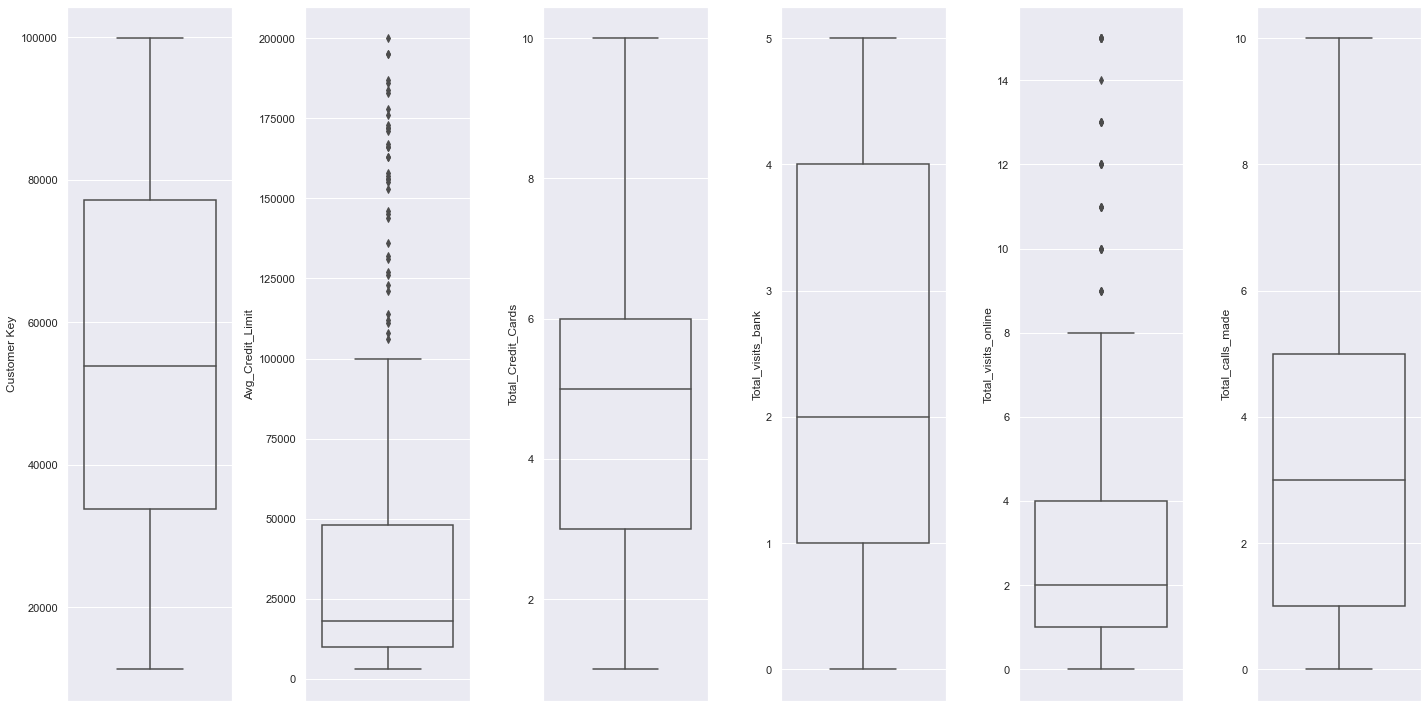


To check pairwise joint distribution of numeric data


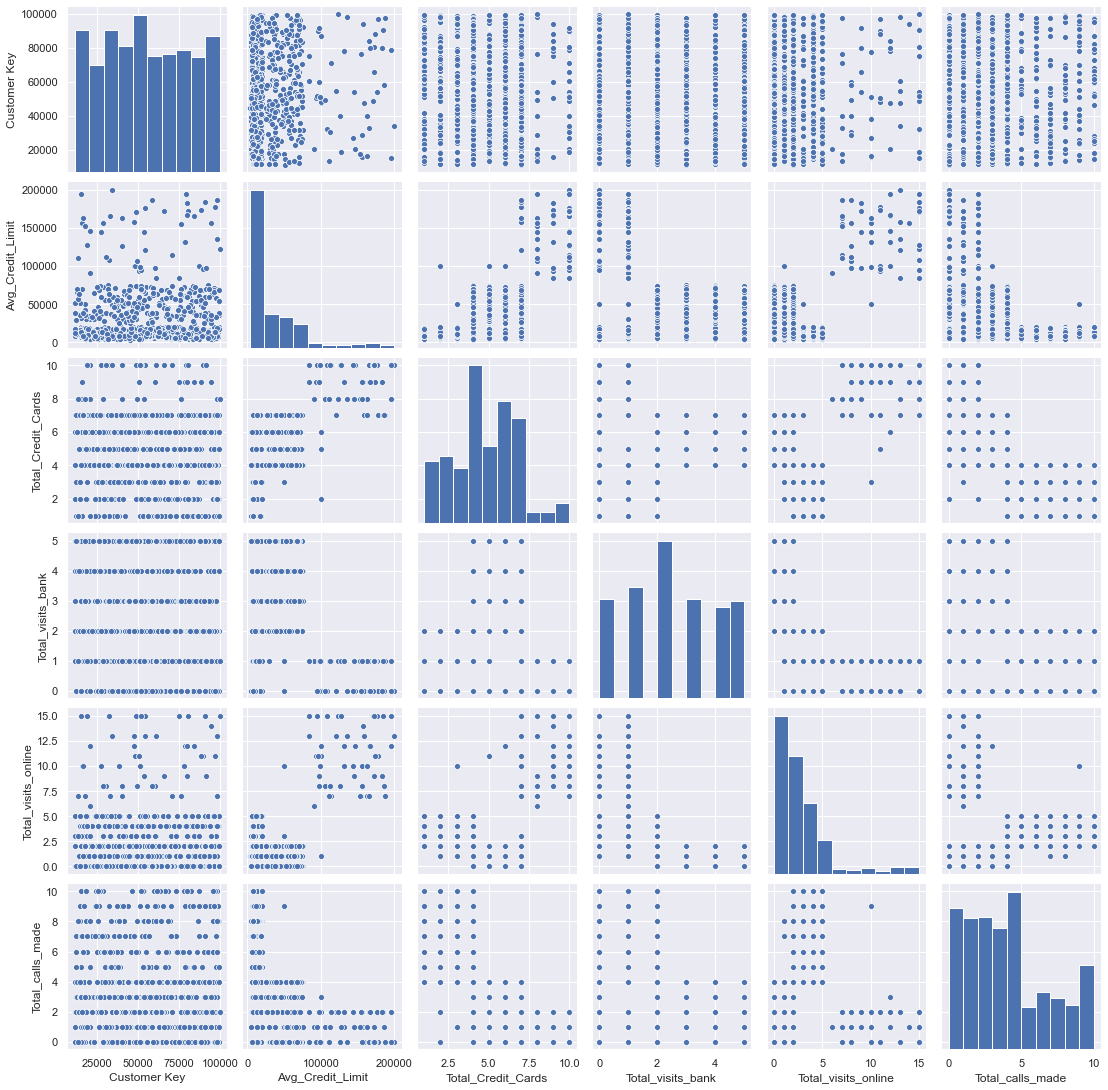


To check time series of numeric data by [daily,monthly,yearly] frequency


In [10]:
eda(data)

Importantly, we know from the above that there are no null or duplicated values in our dataset.


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


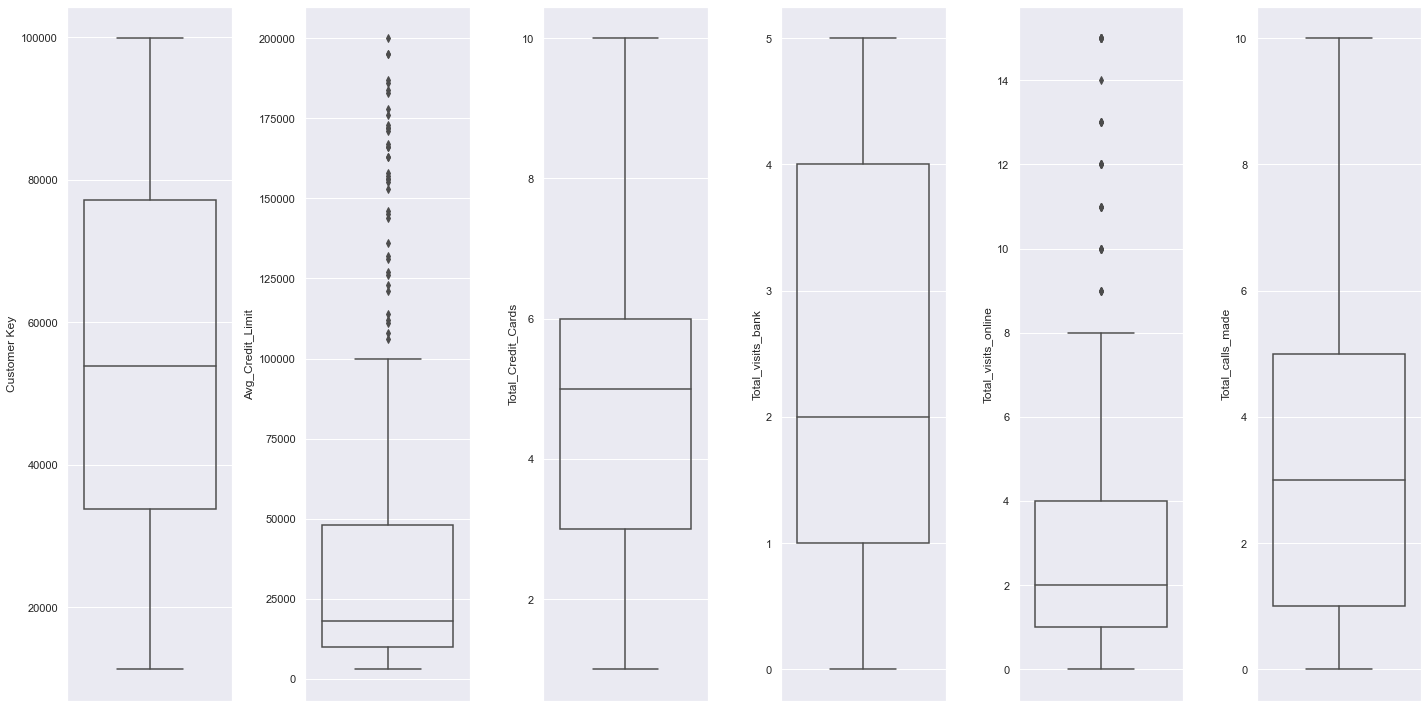


To check pairwise joint distribution of numeric data


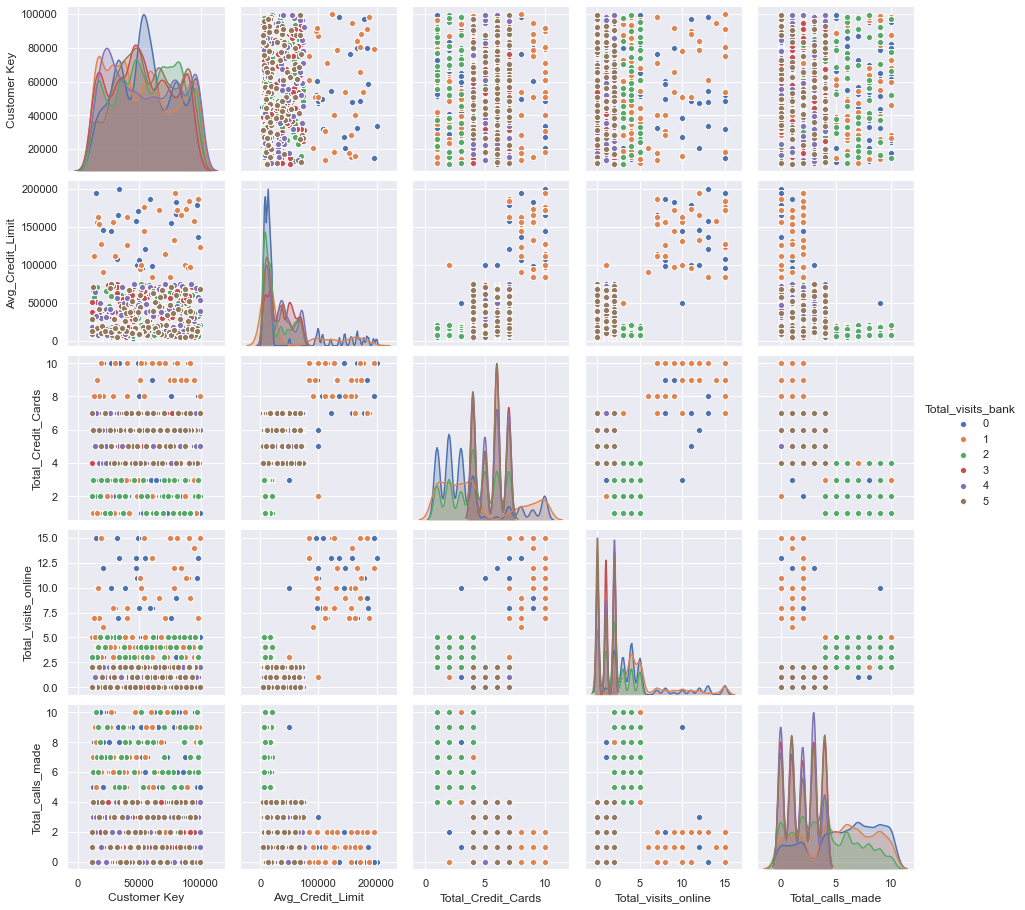

In [11]:
numeric_eda(data, hue='Total_visits_bank')


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


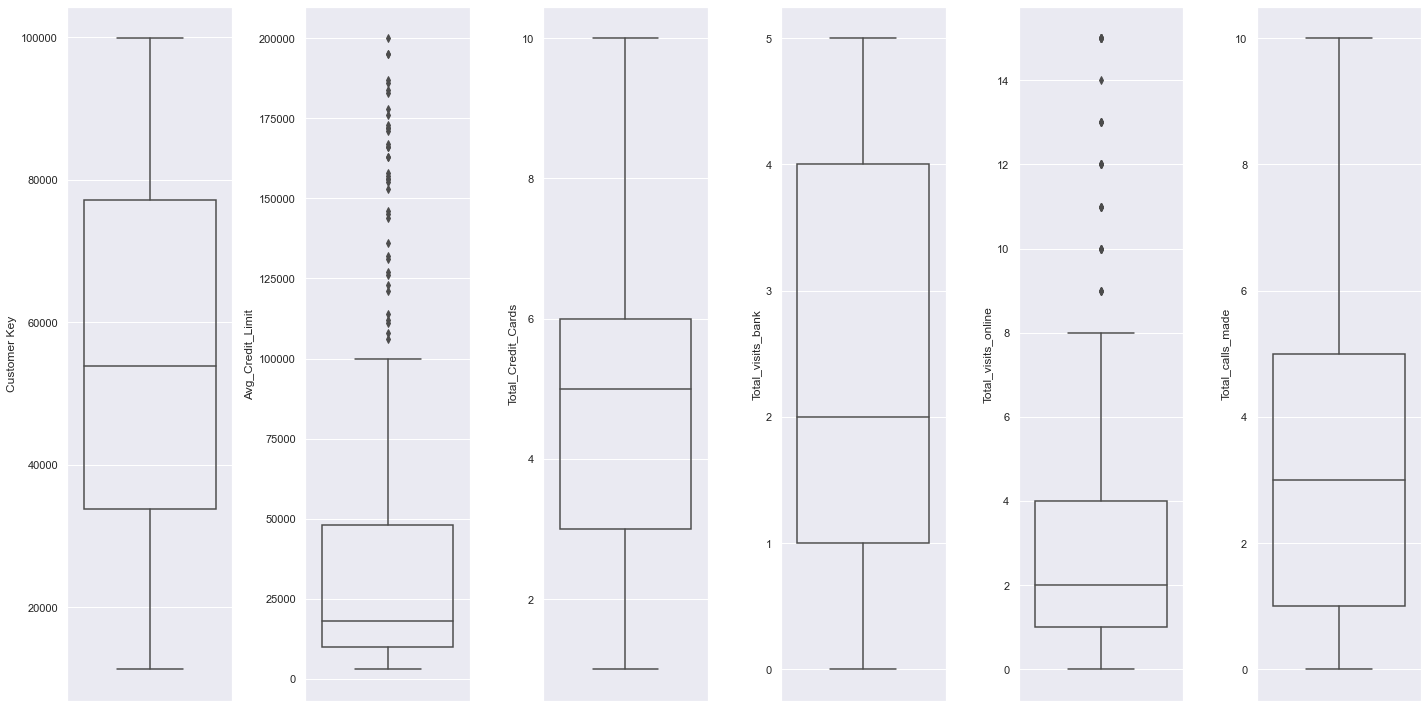


To check pairwise joint distribution of numeric data


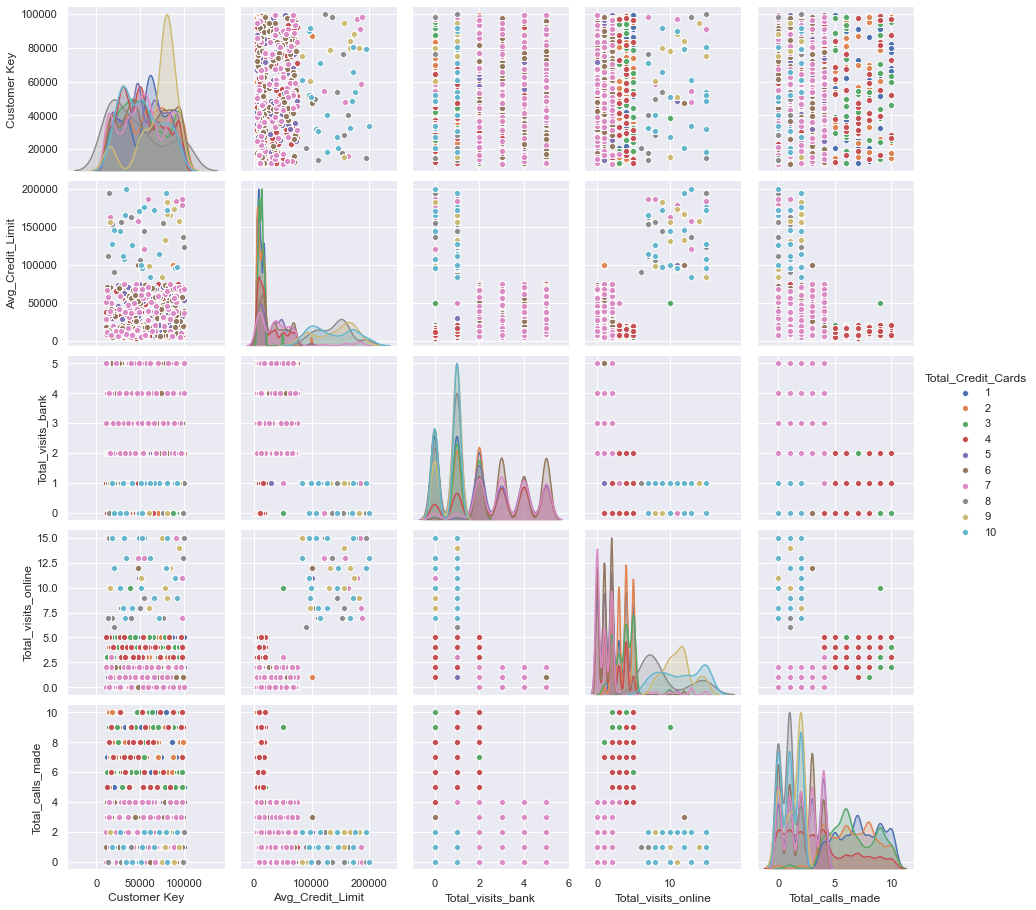

In [12]:
numeric_eda(data, hue='Total_Credit_Cards')


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


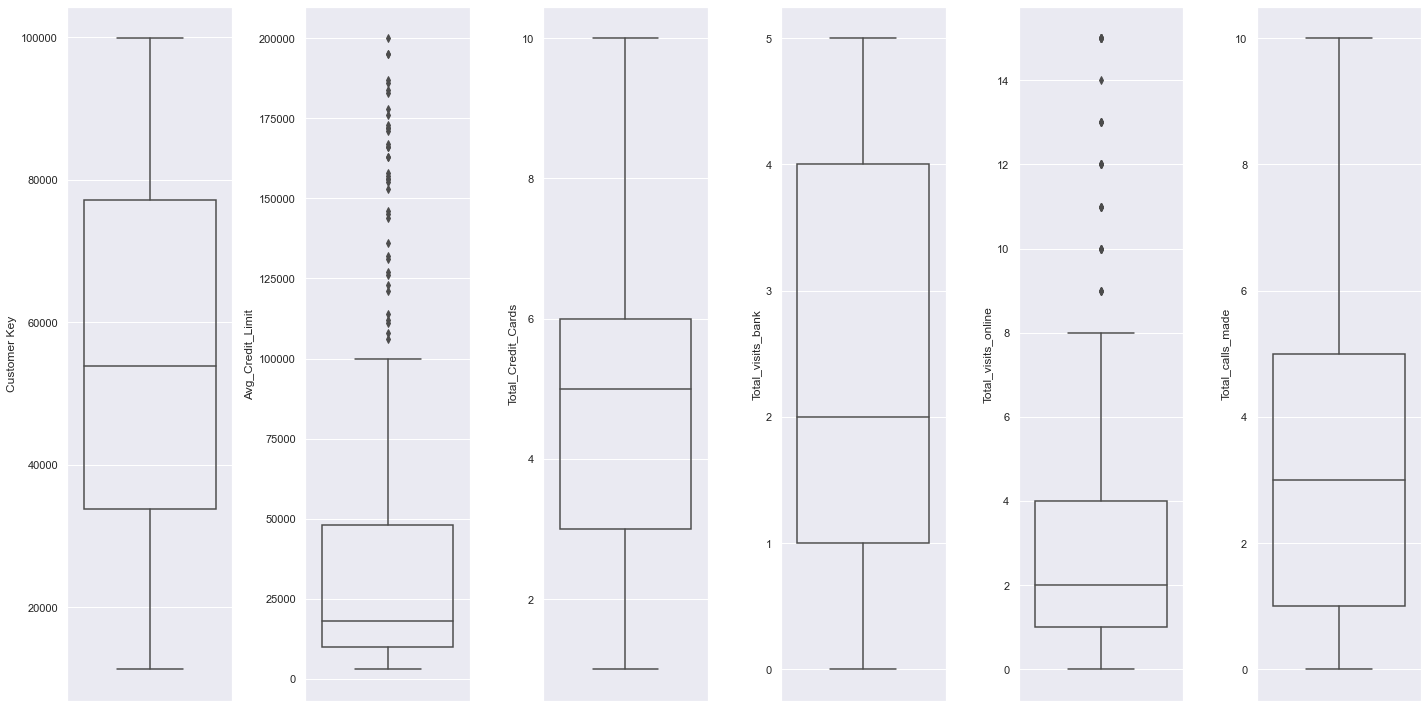


To check pairwise joint distribution of numeric data


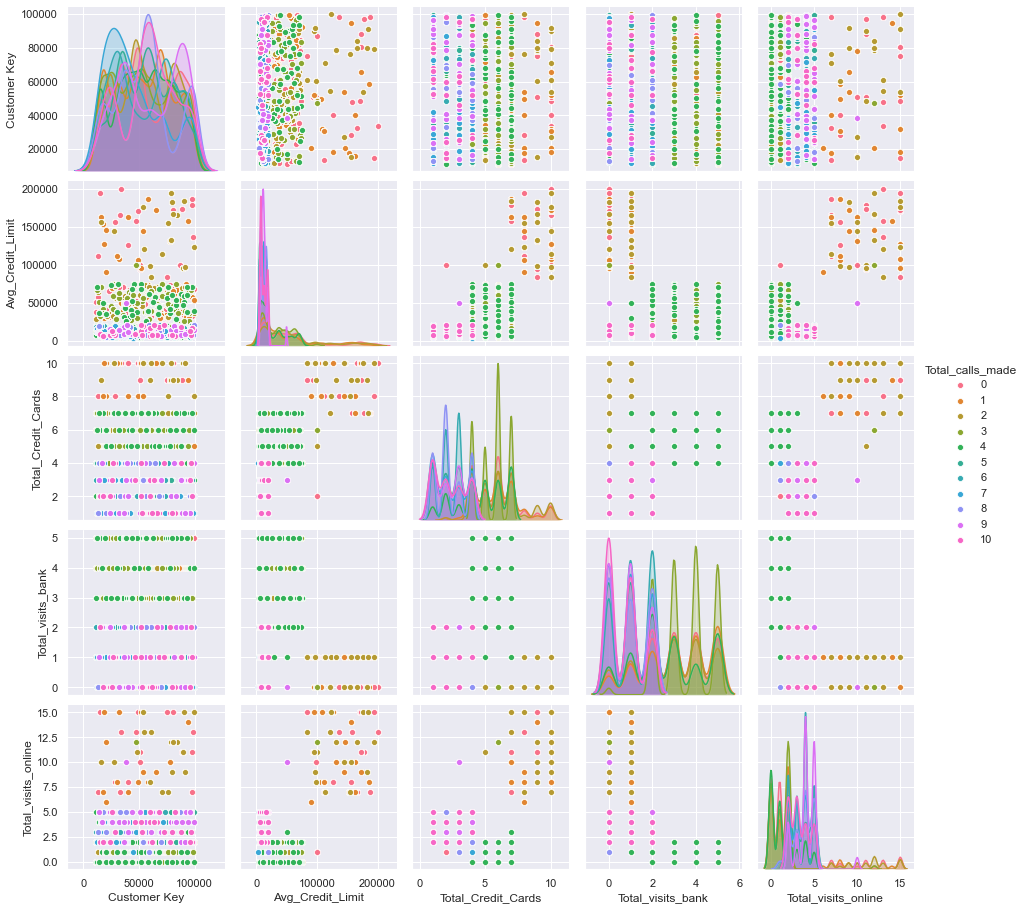

In [13]:
numeric_eda(data, hue='Total_calls_made')

### Univariate analysis

More detailed, specific analysis of individual properties

#### Average credit limit

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

Unique values: 110


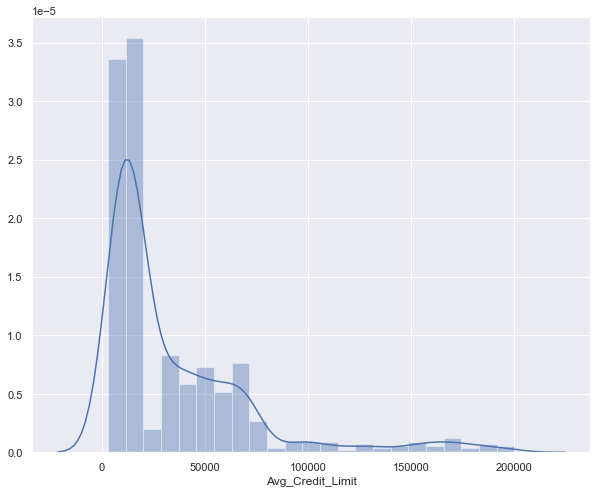

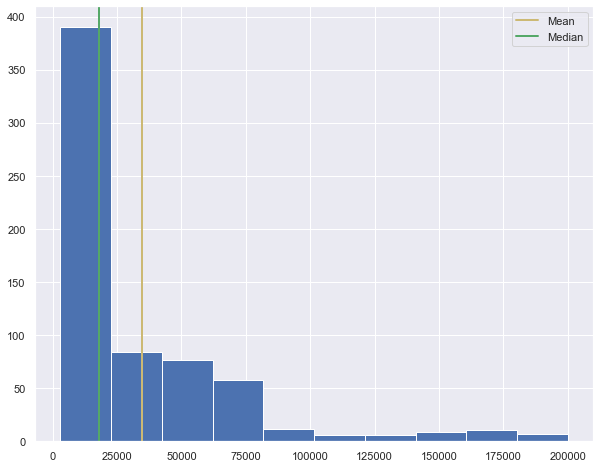

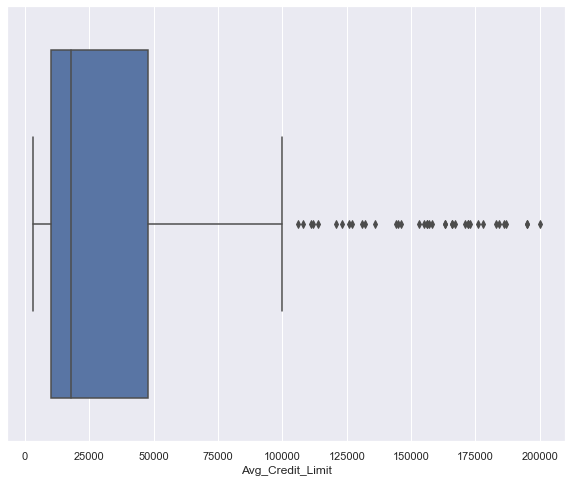

In [15]:
print_summary(data['Avg_Credit_Limit'])

Primarily two groups here, above and below \\$100k credit limit. Higher values ($150-200k) pulling the mean up.

#### Total credit cards

count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

Unique values: 10


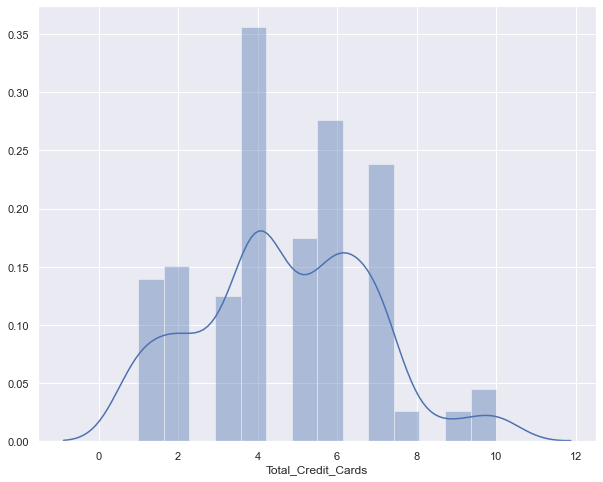

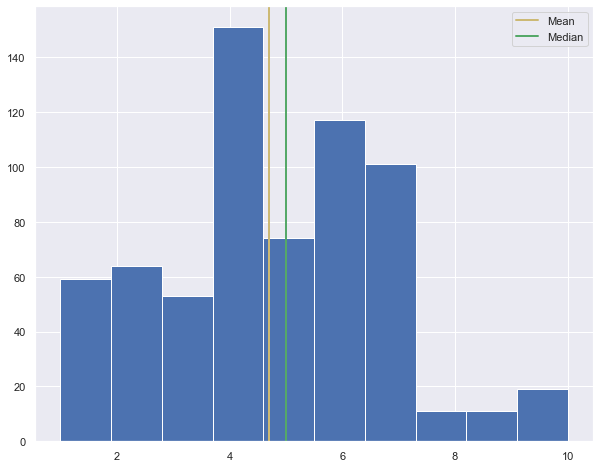

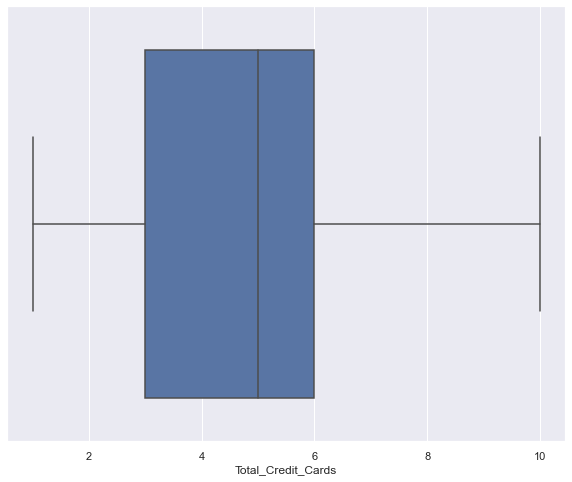

In [16]:
print_summary(data['Total_Credit_Cards'])

#### Total visits (bank)

count    660.000000
mean       2.403030
std        1.631813
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Total_visits_bank, dtype: float64

Unique values: 6


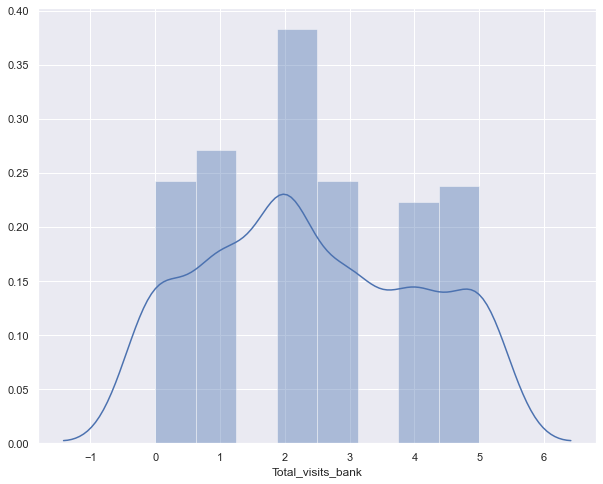

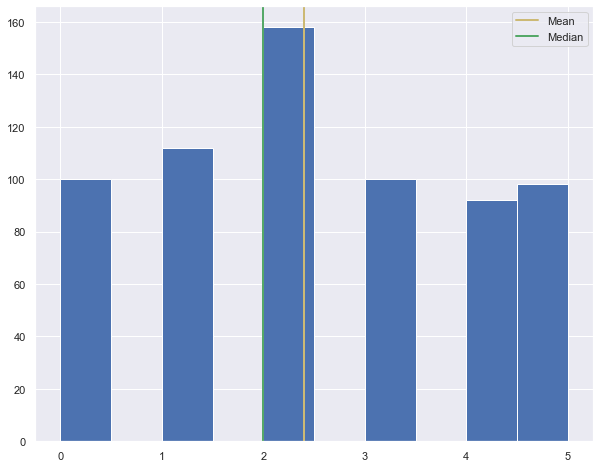

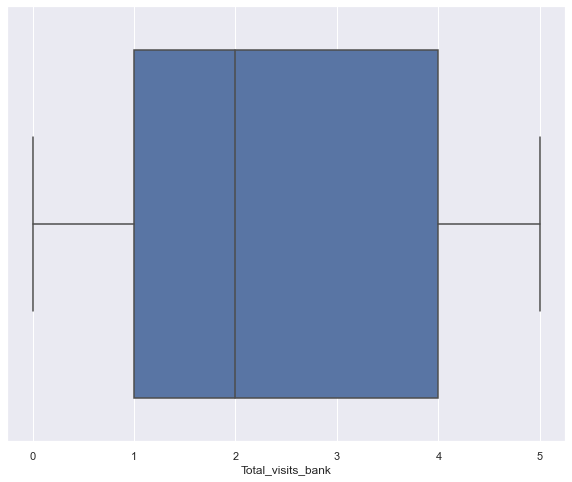

In [17]:
print_summary(data['Total_visits_bank'])

#### Total visits (online)

count    660.000000
mean       2.606061
std        2.935724
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: Total_visits_online, dtype: float64

Unique values: 16


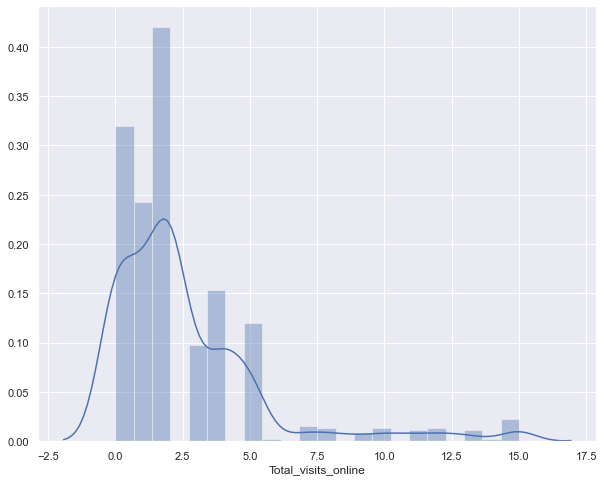

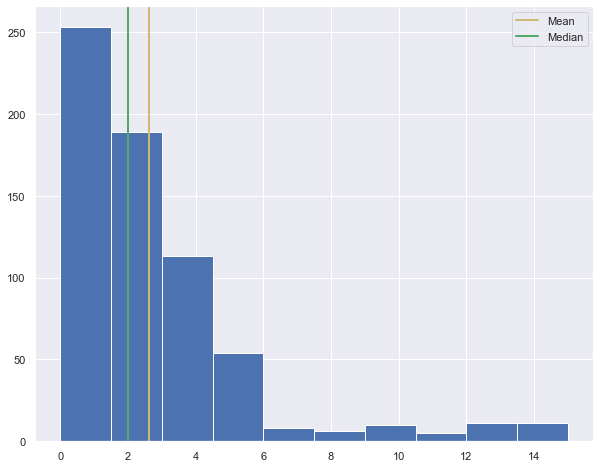

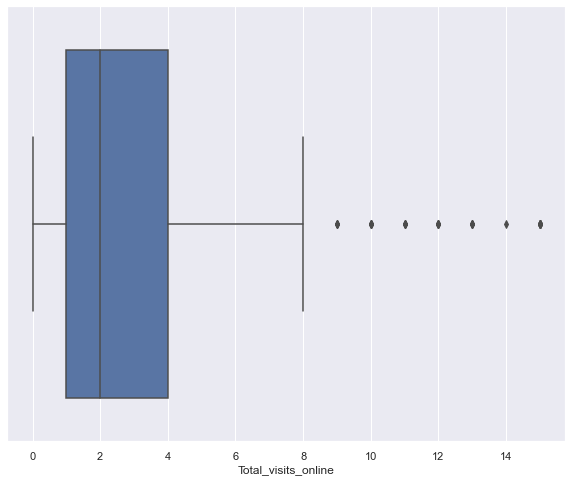

In [19]:
print_summary(data['Total_visits_online'])

Primarily two groups here as well, <= 5 visits online, and > 5 visits online.

#### Total calls made

count    660.000000
mean       3.583333
std        2.865317
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Total_calls_made, dtype: float64

Unique values: 11


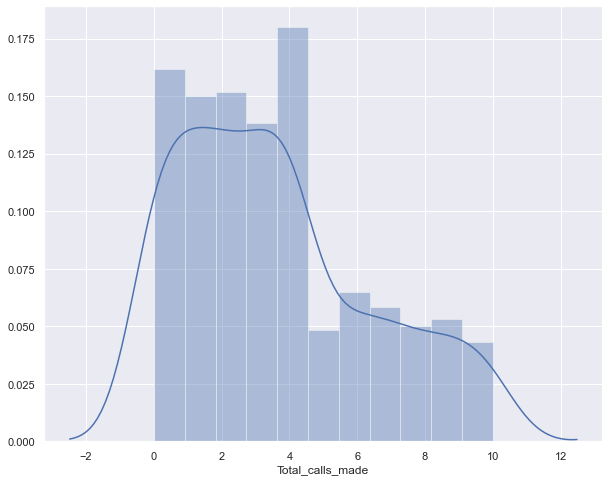

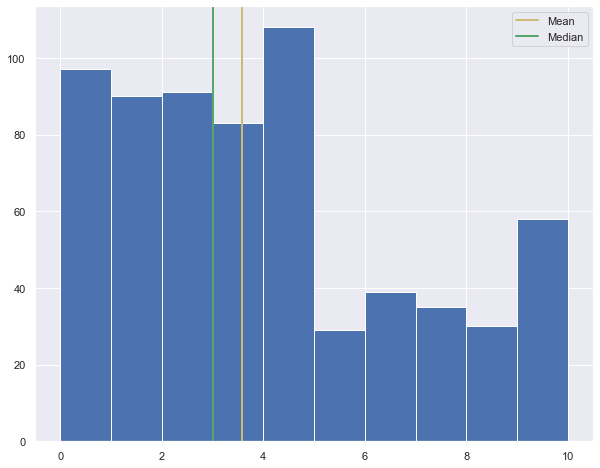

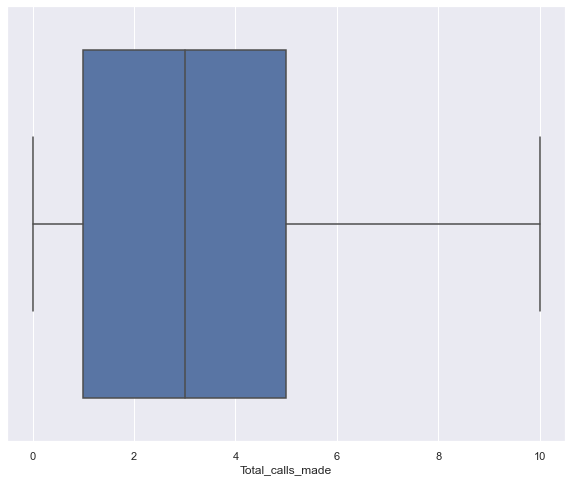

In [20]:
print_summary(data['Total_calls_made'])

### Bivariate Analysis

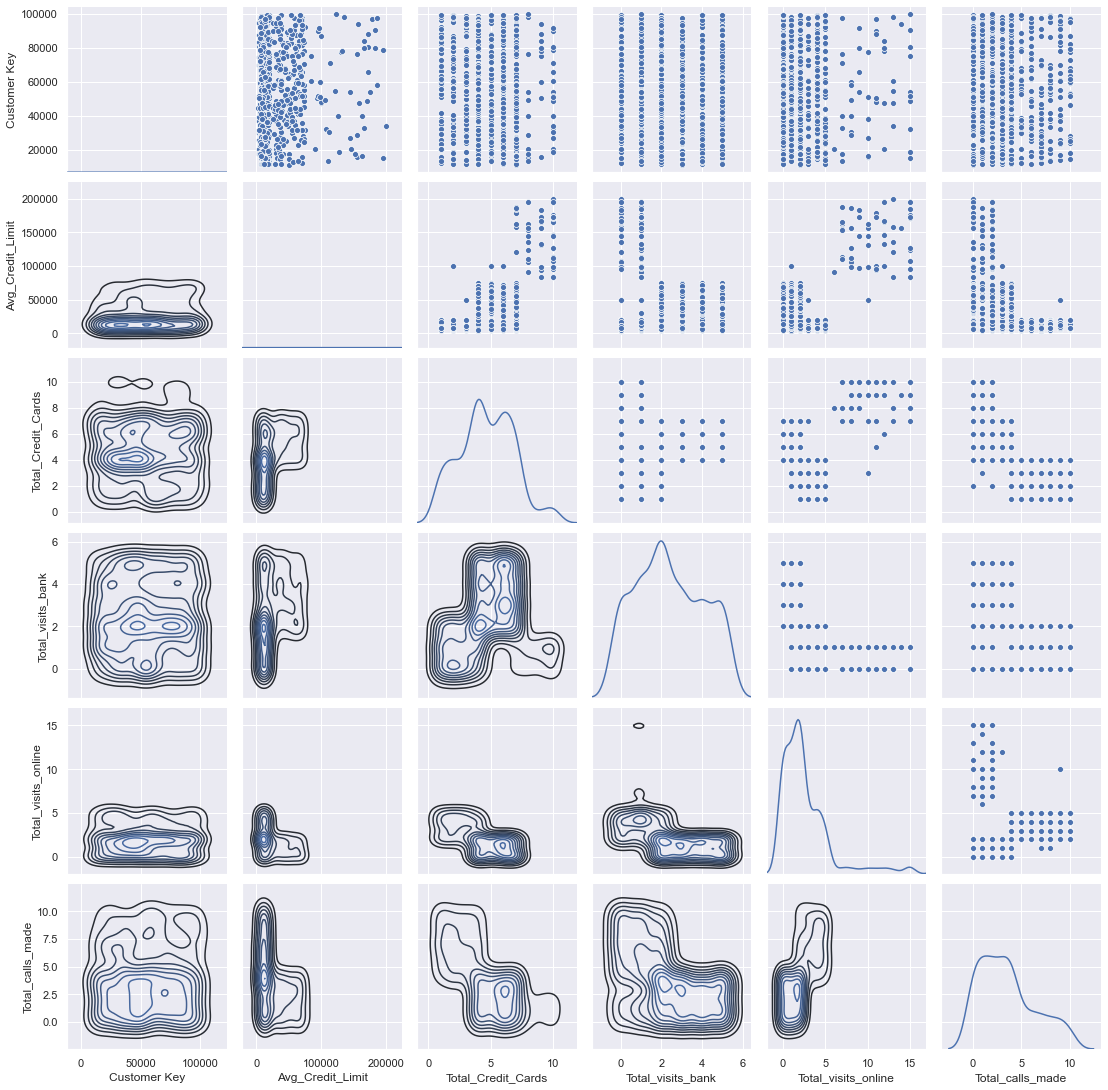

In [23]:
g = sns.PairGrid(data);

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot);

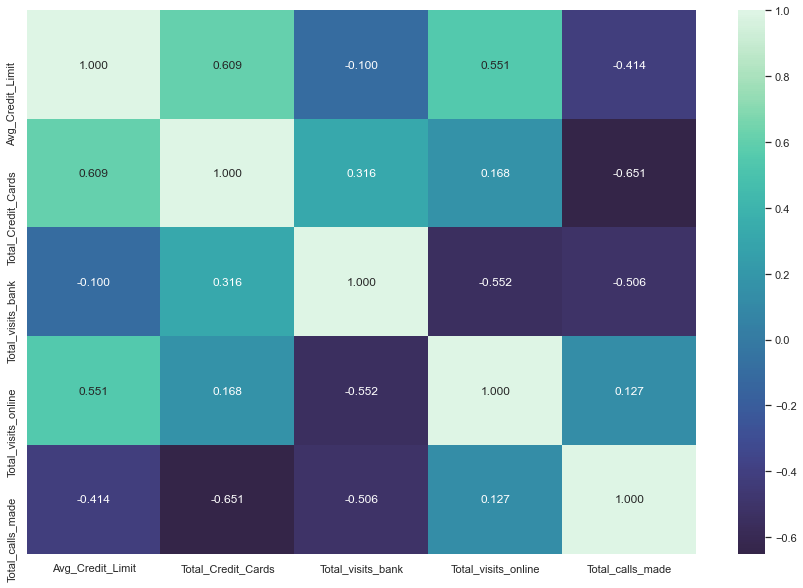

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data[['Avg_Credit_Limit',
                  'Total_Credit_Cards',
                  'Total_visits_bank',
                  'Total_visits_online',
                  'Total_calls_made']].corr(), annot=True, vmin=-.651, cmap='mako', center=0, fmt='.3f');

## Scale data

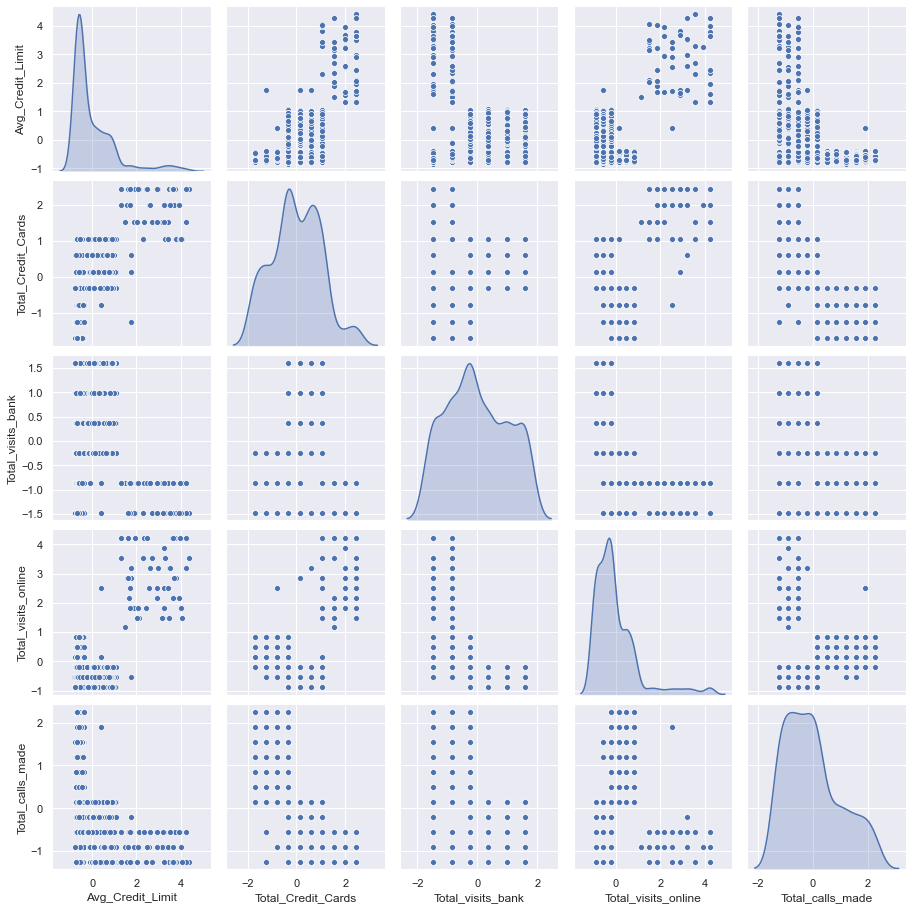

In [24]:
from scipy.stats import zscore

# Remove the customer key, which should be ignored for clustering
attr = data.iloc[:,1:]
scaled = attr.apply(zscore)

sns.pairplot(scaled, diag_kind='kde');

## Analyze cluster options with elbow and box plots

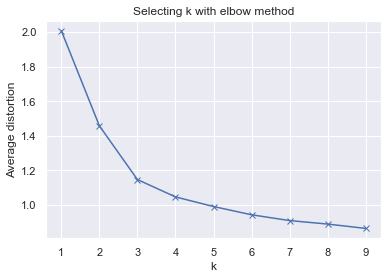

In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range(1,10)
mean_distortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled)
    prediction = model.predict(scaled)
    mean_distortions.append(sum(np.min(cdist(scaled, model.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])
    
plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with elbow method');

In [27]:
three_group = KMeans(3)
three_group.fit(scaled)
prediction = three_group.predict(scaled)

data['K3'] = prediction
scaled['K3'] = prediction

scaled_cluster = scaled.groupby(['K3'])
scaled_cluster.mean()

KMeans(n_clusters=3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


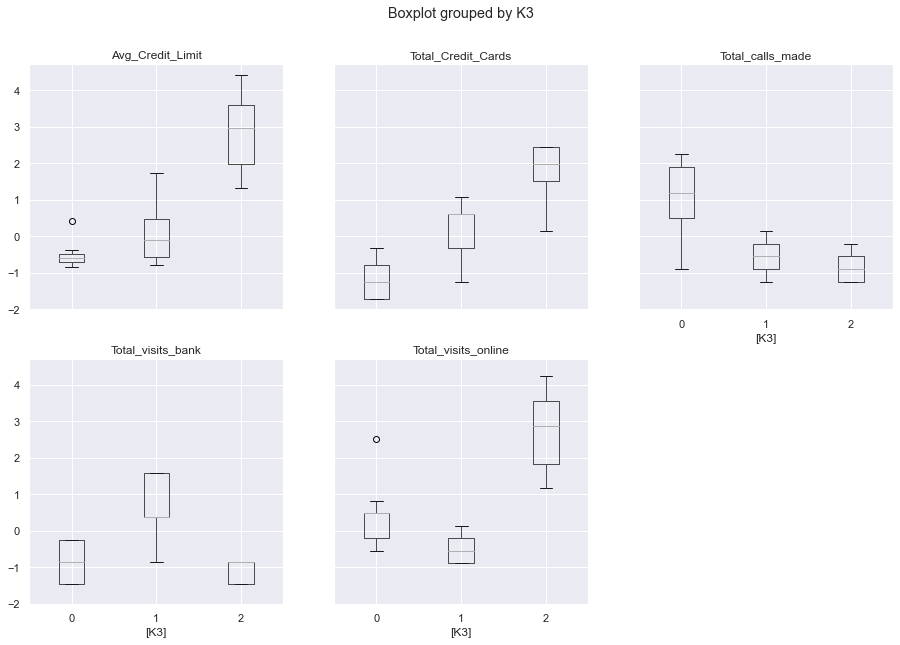

In [28]:
scaled.boxplot(by='K3', layout=(2,3), figsize=(15,10));

We can see three clear groups with little overlap:

**Group 0**
* Below-average credit limit
* Few or no credit cards
* Few or no in-person bank visits
* Average number of online visits
* Above-average calls made

**Group 1**
* Average credit limit
* Average number of credit cards
* Above average number of in-person visits
* Little online usage
* Few calls made

**Group 2**
* Very high credit limit
* High number of credit cards
* Few or no in-person bank visits
* High online usage
* Few or no calls made

With no overlap it is clear we don't want fewer clusters.

### Hierarchical clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist, cdist

hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hc_model.fit(scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [31]:
data['hc3'] = hc_model.labels_
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3,hc3
Sl_No,,,,,,,,
1,87073,100000,2,1,1,0,1,0
2,38414,50000,3,0,10,9,0,2
3,17341,50000,7,1,3,4,1,0
4,40496,30000,5,1,1,4,1,0
5,47437,100000,6,0,12,3,2,1


In [32]:
data_clust = data.groupby(['hc3'])
data_clust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3
hc3,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,1
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2
2,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,0


Agglomerative clustering with these parameters gave us the same groups as the K-Means Clustering.

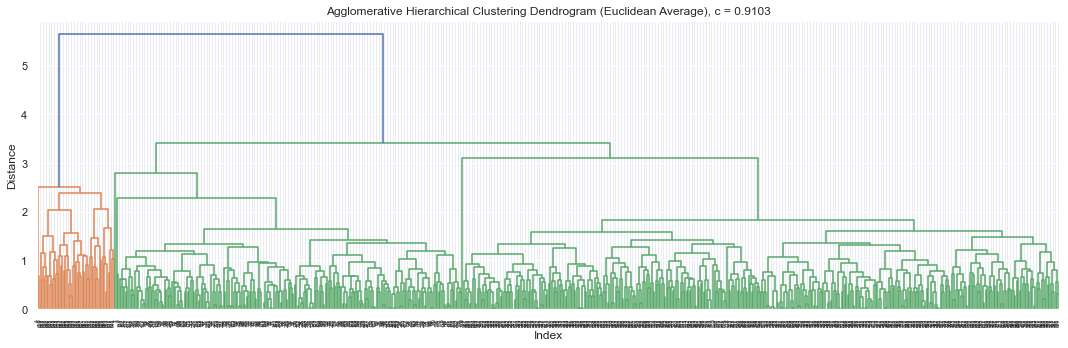

In [47]:
z = linkage(scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(z, pdist(scaled))

plt.figure(figsize=(15,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Average), c = ' + str(round(c, 4)))
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout();

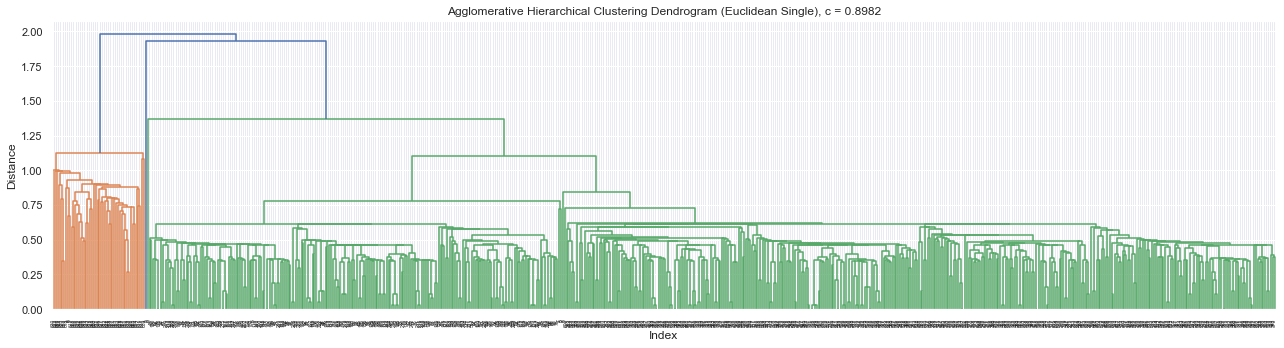

In [48]:
z = linkage(scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(z, pdist(scaled))

plt.figure(figsize=(18, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Single), c = ' + str(round(c, 4)))
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout();

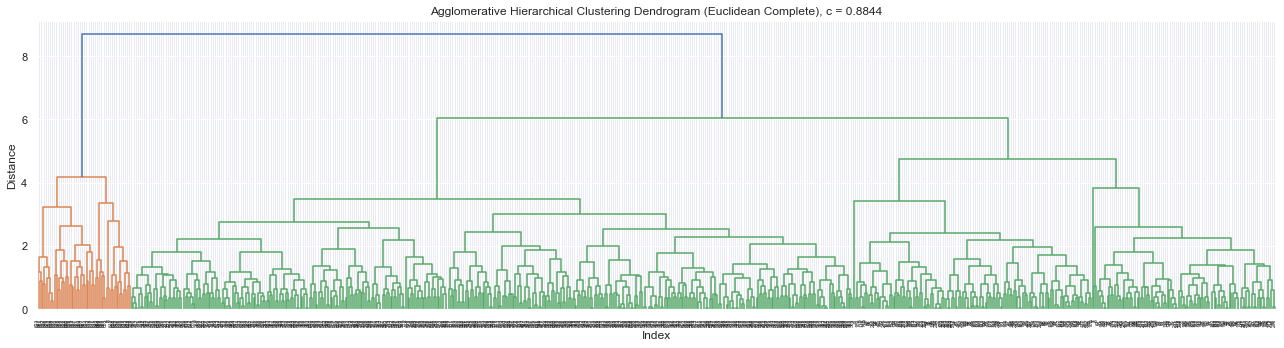

In [49]:
z = linkage(scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(z, pdist(scaled))

plt.figure(figsize=(18, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Complete), c = ' + str(round(c, 4)))
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout();

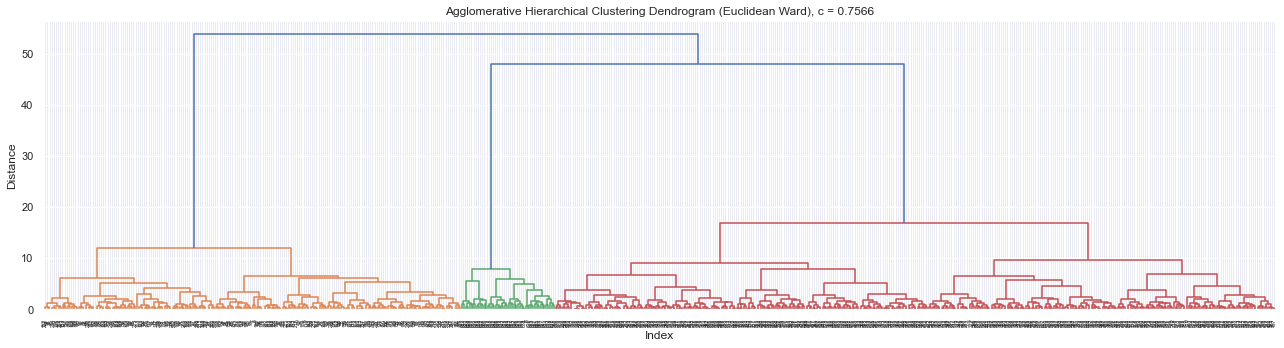

In [50]:
z = linkage(scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(z, pdist(scaled))

plt.figure(figsize=(18, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Ward), c = ' + str(round(c, 4)))
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout();

### Silhouette scores

In [53]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled, prediction)

silhouette_avg

0.5397786437631975

In [54]:
silhouette_avg = silhouette_score(scaled, hc_model.labels_)

silhouette_avg

0.5397786437631975